In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img = cv2.imread('C:\\Users\\Sorcim\\Computer Vision with OpenCV and Deep Learning\\DATA\\road_image.jpg')

### 1. OpenCV image read

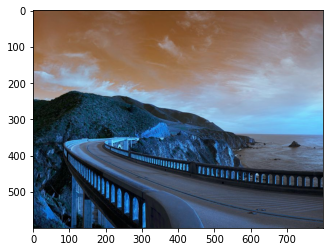

In [6]:
plt.imshow(img);

### Convert to RGB

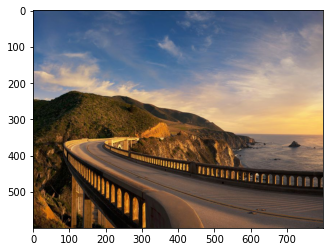

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

### Convert to HSV

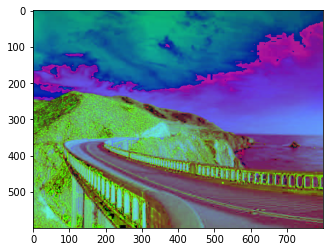

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img);

### Convert to HLS

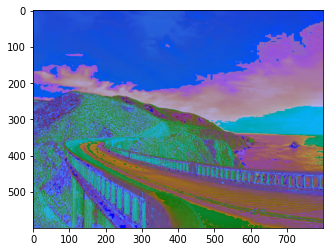

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(img);

### Blending and Pasting Images

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img_1 = cv2.imread('C:/Users/Sorcim/Computer Vision with OpenCV and Deep Learning/DATA/road_image.jpg')
img_2 = cv2.imread("C:/Users/Sorcim/Computer Vision with OpenCV and Deep Learning/DATA/wood_detail.jpg")

In [14]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

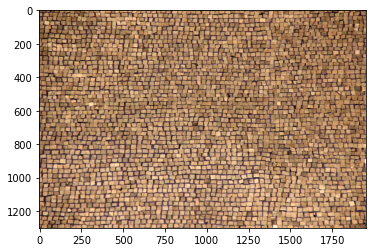

In [7]:
plt.imshow(img_2);

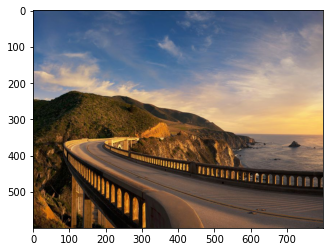

In [8]:
plt.imshow(img_1);

### Blending Images of the same size

In [9]:
img_1.shape, img_2.shape

((600, 800, 3), (1300, 1950, 3))

In [15]:
img_2 = cv2.resize(img_2, (800, 600))

In [16]:
img_2.shape

(600, 800, 3)

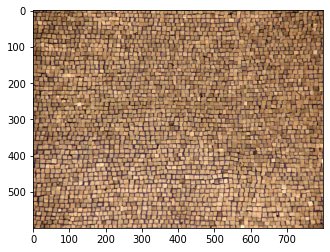

In [17]:
plt.imshow(img_2);

In [18]:
img_1.shape, img_2.shape

((600, 800, 3), (600, 800, 3))

In [30]:
blended = cv2.addWeighted(src1=img_1, alpha=0.8, src2=img_2, beta=0.4, gamma=0)

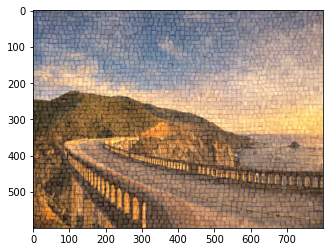

In [31]:
plt.imshow(blended);

> addWrighted function works when both the images are in a same size 
### Overlay an images on top of large image. (No Blending)
#### Numpu reassignment

In [53]:
img_1 = cv2.imread('C:/Users/Sorcim/Computer Vision with OpenCV and Deep Learning/DATA/road_image.jpg')
img_2 = cv2.imread("C:/Users/Sorcim/Computer Vision with OpenCV and Deep Learning/DATA/wood_detail.jpg")

In [54]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

In [55]:
img_2 = cv2.resize(img_2, (200, 400))

In [56]:
img_1.shape, img_2.shape

((600, 800, 3), (400, 200, 3))

In [57]:
large_img = img_1
small_img = img_2

In [58]:
x_offset = 0
y_offset = 0

In [59]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [60]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

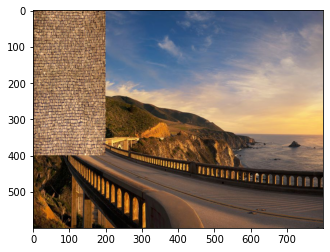

In [61]:
plt.imshow(large_img);

> we can do this with numpy its simply take a chunk of image and replace the values of the images

### Blend together images of different sizes

In [62]:
import numpy as np
import cv2

In [89]:
# Load two images
img1 = cv2.imread("C:/Users/Sorcim/Computer Vision with OpenCV and Deep Learning/DATA/windows-10-laptop-1280x720.jpg")
img2 = cv2.imread("C:/Users/Sorcim/Computer Vision with OpenCV and Deep Learning/DATA/watermark_no_copy.png")
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

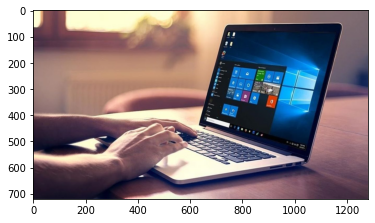

In [90]:
plt.imshow(img1);

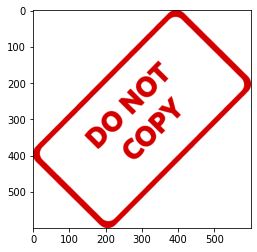

In [91]:
plt.imshow(img2);

In [92]:
img1.shape

(720, 1280, 3)

In [93]:
img2.shape

(600, 600, 3)

In [94]:
x_offset=1280 - 600
y_offset=720 - 600

In [95]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape

# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:720,x_offset:1280] # BOTTOM RIGHT CORNER

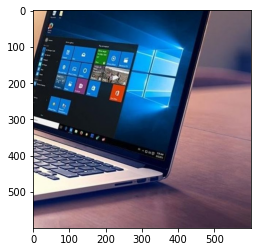

In [96]:
plt.imshow(roi);

In [97]:
roi.shape

(600, 600, 3)

In [98]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [99]:
img2gray.shape

(600, 600)

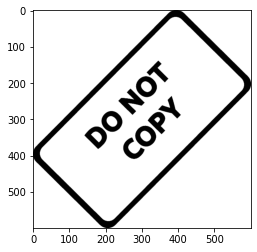

In [100]:
plt.imshow(img2gray,cmap='gray');

> to Convert BLACK text into white we nee to inverse the image by `bitwise_not`

In [101]:
mask_inv = cv2.bitwise_not(img2gray)

In [102]:
mask_inv.shape

(600, 600)

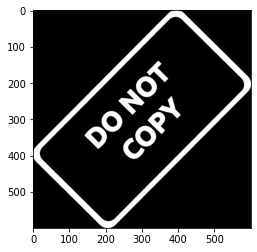

In [103]:
plt.imshow(mask_inv,cmap='gray');

## Convert Mask to have 3 channels

In [104]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [105]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [106]:
bk.shape

(600, 600, 3)

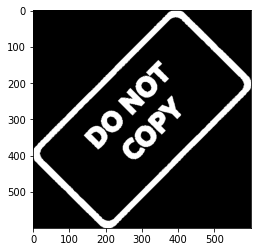

In [107]:
plt.imshow(bk);

### Grab Original FG image and place on top of Mask

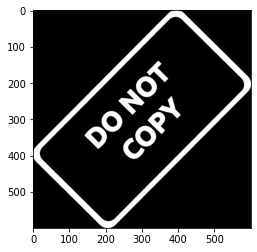

In [109]:
plt.imshow(mask_inv,cmap='gray');

In [110]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

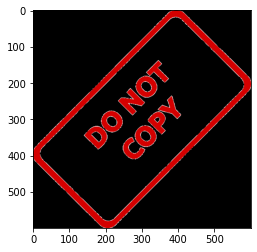

In [112]:
plt.imshow(fg);

In [113]:
fg.shape

(600, 600, 3)

### Get ROI and blend in the mask with the ROI

In [115]:
final_roi = cv2.bitwise_or(roi,fg)

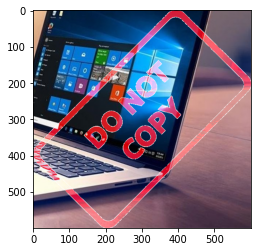

In [117]:
plt.imshow(final_roi);

### Now add in the rest of the image

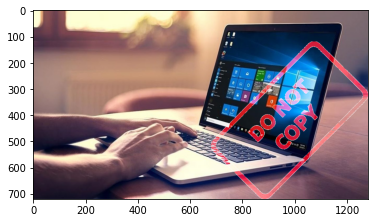

In [119]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img);